In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pyspark.sql import SparkSession
from pyspark.sql.functions import col, avg

spark = SparkSession.builder.appName("DatingApp").getOrCreate()

In [3]:
df = spark.read.csv("hdfs://namenode:8020/user/hadoop/dating_app.csv", header = True, inferSchema=True)

In [4]:
df.printSchema()

root
 |-- gender: string (nullable = true)
 |-- sexual_orientation: string (nullable = true)
 |-- location_type: string (nullable = true)
 |-- income_bracket: string (nullable = true)
 |-- education_level: string (nullable = true)
 |-- interest_tags: string (nullable = true)
 |-- app_usage_time_min: integer (nullable = true)
 |-- app_usage_time_label: string (nullable = true)
 |-- swipe_right_ratio: double (nullable = true)
 |-- swipe_right_label: string (nullable = true)
 |-- likes_received: integer (nullable = true)
 |-- mutual_matches: integer (nullable = true)
 |-- profile_pics_count: integer (nullable = true)
 |-- bio_length: integer (nullable = true)
 |-- message_sent_count: integer (nullable = true)
 |-- emoji_usage_rate: double (nullable = true)
 |-- last_active_hour: integer (nullable = true)
 |-- swipe_time_of_day: string (nullable = true)
 |-- match_outcome: string (nullable = true)



In [5]:
#Analisis: "Quienes han encontrado match mas rapido?"

In [6]:
#Primer analisis sera de quienes encuentran match mas seguido en base a nivel de educacion

In [7]:
pdf = df.select("gender", "sexual_orientation", "education_level", 
                "app_usage_time_min", "mutual_matches", "location_type", 
                "income_bracket", "swipe_right_label").toPandas()
pdf

,gender,sexual_orientation,education_level,app_usage_time_min,mutual_matches,location_type,income_bracket,swipe_right_label
0,Prefer Not to Say,Gay,Bachelor’s,52,23,Urban,High,Optimistic
1,Male,Bisexual,No Formal Education,279,7,Suburban,Upper-Middle,Optimistic
2,Non-binary,Pansexual,Master’s,49,27,Suburban,Low,Optimistic
3,Genderfluid,Gay,Postdoc,185,6,Metro,Very Low,Balanced
4,Male,Bisexual,Bachelor’s,83,11,Urban,Middle,Balanced
...,...,...,...,...,...,...,...,...
49995,Transgender,Gay,Postdoc,130,8,Metro,Very High,Optimistic
49996,Female,Lesbian,Diploma,277,1,Small Town,Low,Optimistic
49997,Male,Bisexual,High School,73,8,Remote Area,High,Optimistic
49998,Transgender,Queer,MBA,100,19,Urban,Low,Balanced


In [96]:
agg_data = pdf.groupby(['gender', 'sexual_orientation', 'education_level', 'income_bracket', 
                        'location_type', 'swipe_right_label']).agg({'mutual_matches': 'mean'}).reset_index()


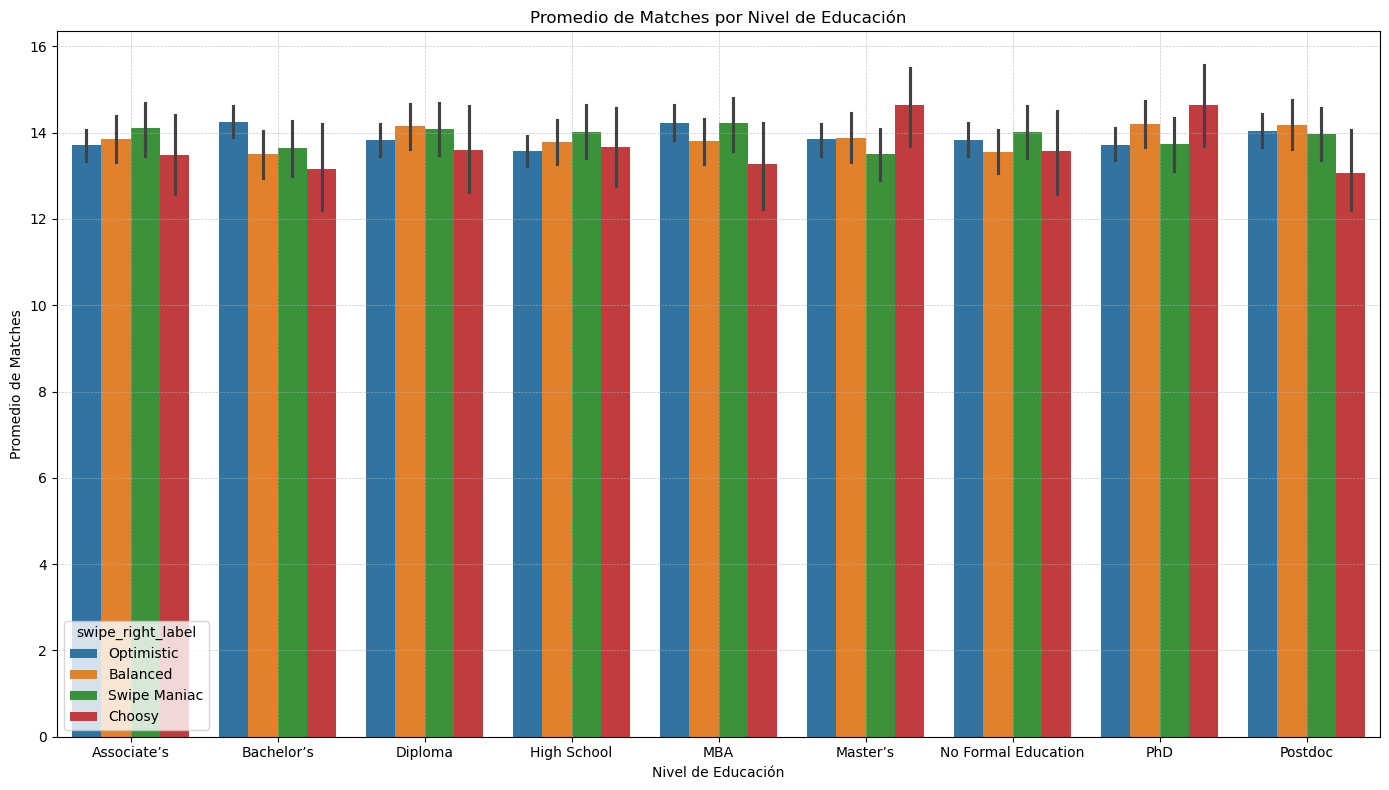

In [97]:
plt.figure(figsize=(14, 8))
sns.barplot(data=agg_data, x='education_level', y='mutual_matches', hue='swipe_right_label')
plt.title('Promedio de Matches por Nivel de Educación')
plt.xlabel('Nivel de Educación')
plt.ylabel('Promedio de Matches')
plt.xticks(rotation=45, ha='right')

plt.grid(True, which='major', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
#teniamos que tomar en cuenta varias cosas, como genero, orientacion sexual y pues su nivel de educacion, pero creo que para poder 
#mejor definirlo teniamos que dividirlo en que tanto intereactuan con la aplicacion, por eso hay 4 colores, uno para cada tipo de persona, 
#con esto podemos tener un mejor entendimeinto de quienes son nuestros usarios, para que algoritmo busco mas casos de exito 